In [1]:
import random
import sys, os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

sys.path.append(os.path.abspath("../"))
sys.path.append(os.path.abspath("./"))
from yolo import YOLO
from utils import *

Using TensorFlow backend.


- keep every classified car as is
- count trucks and motorbikes
- count non-classified images

In [2]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [15, 4]

params = {
'model_path':   f'../{YOLO.get_defaults("model_path")}',
    'anchors_path': f'../{YOLO.get_defaults("anchors_path")}',
    'classes_path': f'../{YOLO.get_defaults("classes_path")}',
    'font': '../font/FiraMono-Medium.otf',
    'image':  True,
}
model = YOLO(**params)

detection_file_path = '../data/output/mhca/detection_output.txt'
classes  = model._get_class()
id2class = {str(i): classes[i] for i in range(len(classes))}
img2bbs = get_predictions(detection_file_path)
img2bb  = explode_dict(img2bbs)

non_classified_image_paths = [path for path, bbs in img2bbs.items() if len(bbs) == 0]

../model_data/yolo.h5 model, anchors, and classes loaded.


## Some stats

In [3]:
prediction_counts_series = pd.Series([elem[1].prediction for elem in img2bb])
counts_series_minority, counts_series_majority = get_value_counts(prediction_counts_series, id2class)

print(f'NUMBER OF IMAGES:          {len(img2bbs)}')
print(f'NUMBER OF BOUNDING BOXES:  {len(img2bb)}')

print(f'NUMBER OF NON-CLASSIFIED:  {len(non_classified_image_paths)}')

NUMBER OF IMAGES:          16481
NUMBER OF BOUNDING BOXES:  20203
NUMBER OF NON-CLASSIFIED:  1841


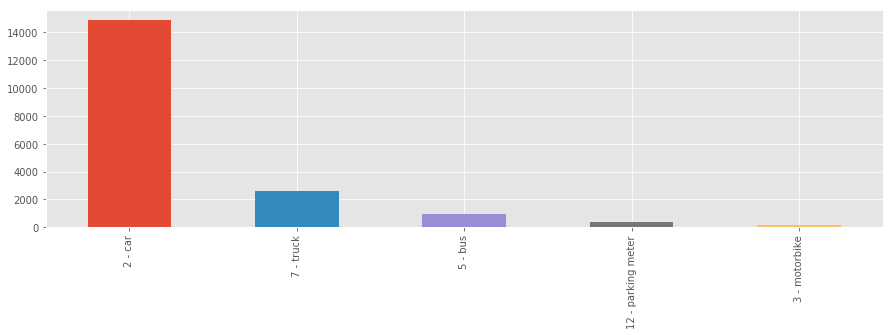

In [4]:
counts_series_majority.sort_values(ascending=False).plot.bar();

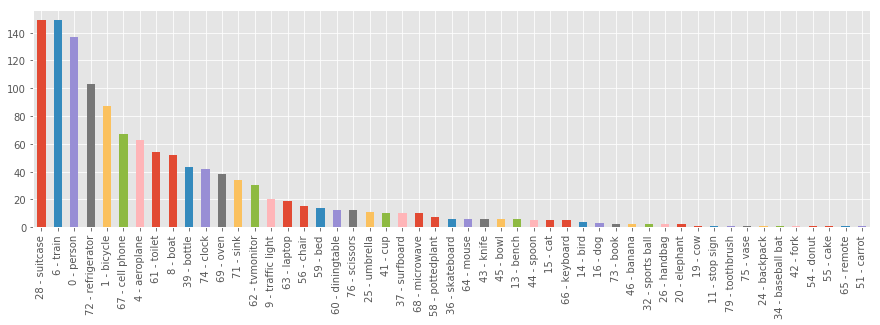

In [5]:
counts_series_minority.sort_values(ascending=False).plot.bar();

## Example of prediction

parking meter
['../data/input/mhca-cropped/X102ENV/X102ENV_0.jpg']


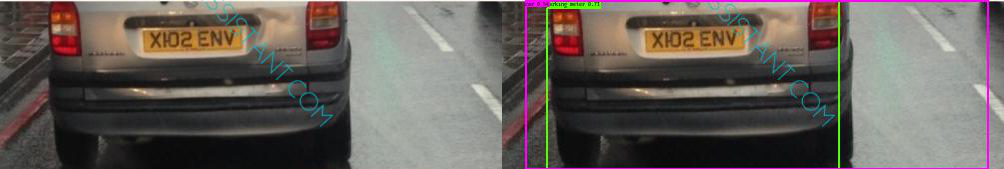

In [6]:
class_id = '12'
print(id2class[class_id])
get_sample_of(class_id, img2bb)[0]

## Example of non classified image

['../data/input/mhca-cropped/D491FBD8-AFC1-4A2D-8ED1-D41F4C4544C9/D491FBD8-AFC1-4A2D-8ED1-D41F4C4544C9_1.jpg']


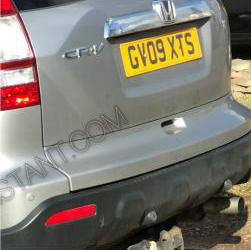

In [7]:
get_sample_from_list(non_classified_image_paths)[0]

## Draw

In [52]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, SelectionRangeSlider
import ipywidgets as widgets

from IPython.display import display as disp

In [31]:
img = get_sample_from_list(non_classified_image_paths)[0]
def print_bb(top, left, right, bottom):
    bb = BoundingBox(f'{top},{left},{right},{bottom},{0}')
    disp(print_coords(img, bb))
    return (top, left, right, bottom)

# constraint top < bottom and left < right ?

top_slider    = IntSlider(min=0,max=img.size[1],step=1,value=img.size[1]/2)
left_slider   = IntSlider(min=0,max=img.size[0],step=1,value=img.size[0]/2)
right_slider  = IntSlider(min=0,max=img.size[1],step=1,value=img.size[1]/2)
bottom_slider = IntSlider(min=0,max=img.size[0],step=1,value=img.size[0]/2)

widgets.interact(
    print_bb,
    top=top_slider,
    left=left_slider,
    right=right_slider,
    bottom=bottom_slider,
    min=0,
    max=img.size[0]
);

['../data/input/mhca-cropped/WP65VPW-MERCEDES-VAN/WP65VPW-MERCEDES-VAN_0.jpg']


interactive(children=(IntSlider(value=100, description='top', max=200), IntSlider(value=124, description='left…

In [128]:
img  = get_sample_from_list(non_classified_image_paths)[0]
def print_box(top, left, right, bottom):
    # if top > bottom:
    #     bottom_slider.value = top
    #     bottom = top
    # elif bottom < top:
    #     top_slider.value = bottom
    #     top = bottom
    # elif left > right:
    #     right_slider.value = left
    #     right = left
    # elif right < left:
    #     left_slider.value = right
    #     left = right
    bb = BoundingBox(f'{top},{left},{right},{bottom},{0}')
    disp(print_coords(img, bb))
    print(f'{bb.top}, {bb.left}, {bb.right}, {bb.bottom}')
    return (top, left, right, bottom)

# try SelectionRangeSlider
# top_slider    = SelectionRangeSlider(options=(1,2), min=0,max=img.size[1],step=1,value=img.size[1]/2)

top_slider    = IntSlider(min=0,max=img.size[1],step=1,value=img.size[1]/2)
left_slider   = IntSlider(min=0,max=img.size[0],step=1,value=img.size[0]/2)
right_slider  = IntSlider(min=0,max=img.size[0],step=1,value=img.size[0]/2)
bottom_slider = IntSlider(min=0,max=img.size[1],step=1,value=img.size[1]/2)

# ui_top = widgets.HBox([widgets.Label(value='Top'), widgets.Label(value='Left'), widgets.Label(value='Right'), widgets.Label(value='Bottom')])
ui = widgets.HBox([top_slider, left_slider, right_slider, bottom_slider])

# def f(x): print(x)
# a = interact(f, x=[('one', 1), ('two', 2)]); 

out = widgets.interactive_output(
    print_box, 
    {'top': top_slider, 'left': left_slider, 'right': right_slider, 'bottom': bottom_slider})
display(ui_top, ui, out)

['../data/input/mhca-cropped/LV65VPD-RENAULT/LV65VPD-RENAULT_0.jpg']


Output()

In [129]:
f'{"/path/to/image/"} {top_slider.value},{left_slider.value},{right_slider.value},{bottom_slider.value},{"class"}'

'/path/to/image/ 118,37,276,187,class'

In [83]:
a.widget.va

<function __main__.f(x)>

In [156]:
img  = get_sample_from_list(non_classified_image_paths)[0]
def print_box2(vertical, horizontal):
    top    = vertical[1]
    left   = horizontal[0]
    right  = horizontal[1]
    bottom = vertical[0]
    bb = BoundingBox(f'{top},{left},{right},{bottom},{0}')
    disp(print_coords(img, bb))
    print(f'{bb.top}, {bb.left}, {bb.right}, {bb.bottom}')
    return (top, left, right, bottom)



v_slider = widgets.SelectionRangeSlider(
    orientation='vertical',
    options=[i for i in range(img.size[1], -1, -1)],
    index=(0, img.size[1]-1),
    description='Top - Down',
    disabled=False
)

h_slider = widgets.SelectionRangeSlider(
    orientation='horizontal',
    options=[i for i in range(0, img.size[0])],
    index=(0, img.size[0]-1),
    description='Left - Right',
    disabled=False
)

out = widgets.interactive_output(
    print_box2, 
    {'vertical': v_slider, 'horizontal':h_slider})


ui_top    = widgets.HBox([h_slider])
ui_bottom = widgets.HBox([v_slider, out])
display(ui_top, ui_bottom)

['../data/input/mhca-cropped/GL05YWZ/GL05YWZ_1.jpg']


In [157]:
f'{"/path/to/image/"} {v_slider.value[1]},{h_slider.value[0]},{h_slider.value[1]},{v_slider.value[0]},{"class"}'

'/path/to/image/ 27,272,321,52,class'